<a href="https://colab.research.google.com/github/here-is-written-a-serious-username/Python_lesson_Colaboratory/blob/lesson/Python_lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Одеса")
data_json = response.json()

In [5]:
df_odesa = pd.DataFrame(data_json["data"])

In [7]:
df_odesa["at"] = pd.to_datetime(df_odesa["at"])
df_odesa=df_odesa.rename(columns = {"at": "Дата", "val":"Вакансії"})
df_odesa.set_index('Дата', inplace=True)

In [8]:
df_odesa['Вакансії']= df_odesa['Вакансії'].replace(0, np.nan)
df_odesa['Вакансії']= df_odesa['Вакансії'].interpolate()
df_odesa['rolling_mean'] = df_odesa['Вакансії'].rolling(window=7).mean()

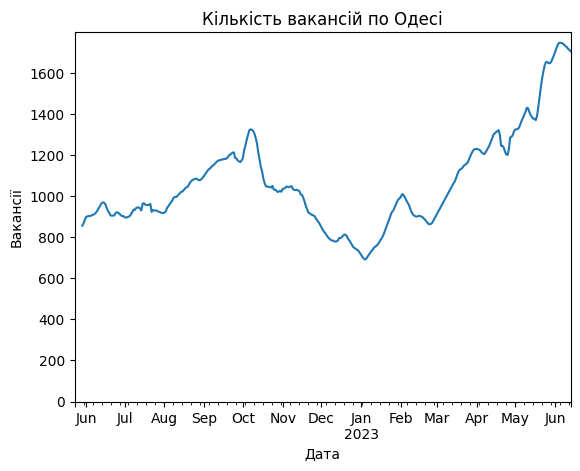

In [11]:
df_odesa['rolling_mean'].plot()
plt.title("Кількість вакансій по Одесі")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [12]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Львів")
data_json = response.json()

In [13]:
df_lviv = pd.DataFrame(data_json["data"])

In [14]:
df_lviv["at"] = pd.to_datetime(df_lviv["at"])
df_lviv=df_lviv.rename(columns = {"at": "Дата", "val":"Вакансії"})
df_lviv.set_index('Дата', inplace=True)
df_lviv['Вакансії']= df_lviv['Вакансії'].replace(0, np.nan)
df_lviv['Вакансії']= df_lviv['Вакансії'].interpolate()
df_lviv['rolling_mean'] = df_lviv['Вакансії'].rolling(window=7).mean()

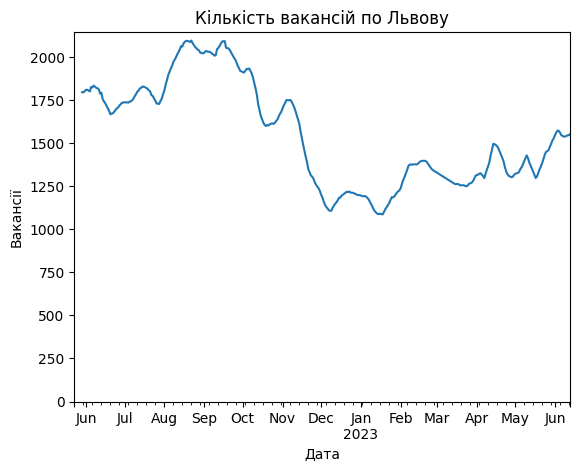

In [16]:
df_lviv['rolling_mean'].plot()
plt.title("Кількість вакансій по Львову")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

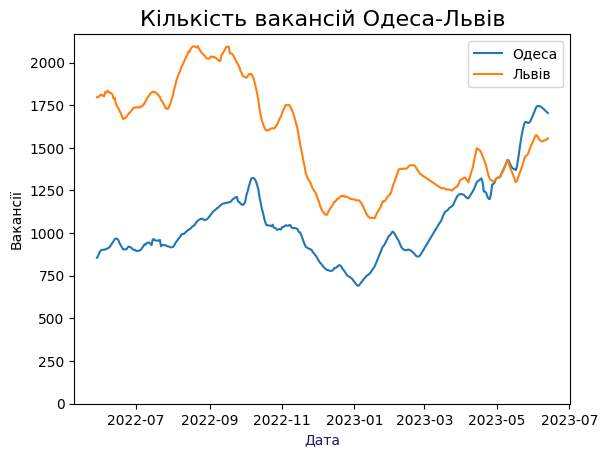

In [17]:
fig, axs =plt.subplots()
axs.plot(df_odesa.index, df_odesa['rolling_mean'], label="Одеса")
axs.plot(df_lviv.index, df_lviv['rolling_mean'], label="Львів")
plt.title("Кількість вакансій Одеса-Львів", fontsize=16)
plt.xlabel('Дата', color='midnightblue')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.legend()
plt.show()